In [12]:
# import libraries
import os
from pathlib import Path
import pandas as pd 
import urllib
import json
import zipfile
from zipfile import ZipFile
import seaborn as sns
from openpyxl import Workbook


In [13]:
# clear folder from previous exercises leaving only trip data zip file
dir_name = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"
folder = os.listdir(dir_name)

for item in folder:
    if item.endswith(".csv") or item.endswith(".txt"):
        os.remove(os.path.join(dir_name, item))

In [14]:
# assign path to data folder
data_path = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"

# file name to download
file = "OpenDataDC_Taxi_2023.zip"

# establish file path
fullfilename = os.path.join(data_path, file)

# assign ZIP file to variable
items = zipfile.ZipFile(fullfilename)

# show files in ZIP
print(items.namelist())

# opening ZIP file in read mode
with zipfile.ZipFile(fullfilename, "r") as file:

    # extract all files inside the ZIP file
    file.extractall(data_path)

['README_DC_Taxicab_trip.txt', 'taxi_202301.csv', 'taxi_202302.csv', 'taxi_202303.csv', 'taxi_202304.csv', 'taxi_202305.csv', 'taxi_202306.csv', 'taxi_202307.csv', 'taxi_202308.csv', 'taxi_202309.csv', 'taxi_202310.csv', 'taxi_202311.csv', 'taxi_202312.csv']


In [15]:
# load monthly files into a single df and visualize process using glob library
## data types indicated to improve performance and columns selected to consolidate df
import glob

import glob
all_dfs = []
for one_filename in glob.glob(r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi*.csv'):
    print(f'Loading {one_filename}')
    new_df= pd.read_csv(one_filename,
                 usecols=['OBJECTID', 'ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR', 'ORIGINZIP', 'DESTINATIONZIP', 'MILEAGE', 'DURATION', 'FAREAMOUNT', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE', 'ORIGINZIP']) 
    all_dfs.append(new_df)

len(all_dfs)

len(all_dfs)

Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202301.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202302.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202303.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202304.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202305.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202306.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents

12

In [16]:
# combine multiple dataframes into one and preview data
taxi_trips = pd.concat(all_dfs)

rows, columns = taxi_trips.shape
print('rows: {:,}\ncolumns: {}'.format(rows, columns))

taxi_trips

rows: 3,092,555
columns: 10


,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,1,15.79,2DA,22202,5.76000,852.0,38.896733,-77.009058,01/01/2023 00:00,01/01/2023 00:00
1,2,10.81,20011,20011,3.11000,650.0,38.952536,-77.003107,01/01/2023 00:00,01/01/2023 00:00
2,3,13.51,20001,20007,4.80000,539.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00
3,4,12.97,20005,20024,2.68000,1187.0,38.901925,-77.033638,01/01/2023 00:00,01/01/2023 00:00
4,5,16.48,20001,20002,5.76000,876.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00
...,...,...,...,...,...,...,...,...,...,...
199303,199304,40.24,20004,20011,9.63000,3024.0,38.895463,-77.021917,12/31/2023 23:00,01/01/2024 00:00
199304,199305,10.00,20002,20002,0.00000,106.0,38.901547,-76.979938,12/31/2023 23:00,12/31/2023 23:00
199305,199306,12.47,20002,20037,2.73000,1078.0,38.897204,-77.008388,12/31/2023 23:00,12/31/2023 23:00
199306,199307,15.67,20002,20010,3.54000,1269.0,38.897204,-77.008388,12/31/2023 23:00,01/01/2024 00:00


OBJECTID                   0.000000
FAREAMOUNT                 7.336038
ORIGINZIP                  0.000000
DESTINATIONZIP             0.000000
MILEAGE                    0.000000
DURATION                   0.000776
ORIGIN_BLOCK_LATITUDE     16.198063
ORIGIN_BLOCK_LONGITUDE    16.198063
ORIGINDATETIME_TR          0.000000
DESTINATIONDATETIME_TR     0.000000
dtype: float64


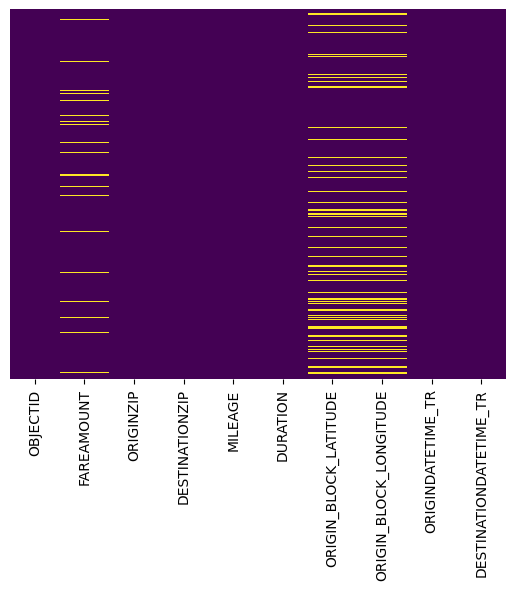

In [17]:
# find missing values, shown as percentage
## visualize as heatmap to show where nulls fall througout date range
sns.heatmap(taxi_trips.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print((taxi_trips.isnull().sum()/len(taxi_trips.index))*100)